In [1]:
###Load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv(r'drug200.csv')

In [3]:
dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
dataset.Drug.unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [6]:
dataset.info()   ### No null data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
### Coverting text or categorical data to number using Label Encoder

from sklearn.preprocessing import LabelEncoder


In [8]:
lab_obj=LabelEncoder()

In [9]:
lab_obj.fit(['F','M'])  ### defining what needs to be changed

LabelEncoder()

In [11]:
dataset.Sex=lab_obj.transform(dataset.Sex)  ### transforming them to numbers

In [12]:
dataset.head()   ### Now the Sex column is converted to numbers

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,drugY
1,47,1,LOW,HIGH,13.093,drugC
2,47,1,LOW,HIGH,10.114,drugC
3,28,0,NORMAL,HIGH,7.798,drugX
4,61,0,LOW,HIGH,18.043,drugY


In [13]:
lab_obj.fit(dataset.BP.unique()) 

LabelEncoder()

In [14]:
dataset.BP=lab_obj.transform(dataset.BP) 

In [15]:
lab_obj.fit(dataset.Cholesterol.unique()) 
dataset.Cholesterol=lab_obj.transform(dataset.Cholesterol) 

In [16]:
dataset.Cholesterol

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    1
199    1
Name: Cholesterol, Length: 200, dtype: int32

In [17]:
dataset.BP

0      0
1      1
2      1
3      2
4      1
      ..
195    1
196    1
197    2
198    2
199    1
Name: BP, Length: 200, dtype: int32

In [19]:
dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [22]:
### Splitting the data to x and y

y=dataset.Drug

In [23]:
x=dataset.loc[:,'Age':'Na_to_K']

In [24]:
### Train the data
 
from sklearn.model_selection import train_test_split

In [43]:

x_train,x_test,y_train,y_test=train_test_split(x,y)

In [44]:
x_train.shape

(150, 5)

In [45]:
y_train.shape

(150,)

In [46]:
x_test.shape, y_test.shape

((50, 5), (50,))

In [47]:
### Algorithm creation
from sklearn.tree import DecisionTreeClassifier

In [61]:
dt_obj=DecisionTreeClassifier(criterion='entropy',max_depth=2)  ### inorder to limit the nodes in tree max_depth is given and by giving this it improves the accuarcy for futuristic data and avoids overfitting

In [62]:
dt_obj.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [63]:
### Predicting the data

y_pred=dt_obj.predict(x_test)

In [51]:
y_pred

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugB', 'drugX', 'drugX', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugB', 'drugY', 'drugA', 'drugX', 'drugY',
       'drugA', 'drugX', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY',
       'drugA', 'drugB', 'drugB', 'drugA', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY', 'drugB',
       'drugA', 'drugY', 'drugY', 'drugY', 'drugB', 'drugY', 'drugA',
       'drugA', 'drugA', 'drugA', 'drugX', 'drugB', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugY', 'drugY'], dtype=object)

In [52]:
y_test[0:5]

122    drugY
131    drugY
46     drugA
84     drugC
96     drugY
Name: Drug, dtype: object

In [55]:
### Evaluating the model using classification report

from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       drugA       1.00      0.60      0.75        10
       drugB       0.00      0.00      0.00         0
       drugC       0.00      0.00      0.00         0
       drugX       1.00      0.71      0.83        17
       drugY       1.00      1.00      1.00        23

    accuracy                           0.82        50
   macro avg       0.60      0.46      0.52        50
weighted avg       1.00      0.82      0.89        50



C:\Users\Elakk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Elakk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Elakk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
from sklearn import tree

[Text(502.20000000000005, 453.0, 'Na_to_K <= 14.839\nentropy = 1.956\nsamples = 150\nvalue = [17, 12, 11, 42, 68]\nclass = drugB'),
 Text(334.8, 271.8, 'BP <= 0.5\nentropy = 1.76\nsamples = 82\nvalue = [17, 12, 11, 42, 0]\nclass = drugC'),
 Text(167.4, 90.59999999999997, 'entropy = 0.978\nsamples = 29\nvalue = [17, 12, 0, 0, 0]\nclass = drugY'),
 Text(502.20000000000005, 90.59999999999997, 'entropy = 0.737\nsamples = 53\nvalue = [0, 0, 11, 42, 0]\nclass = drugC'),
 Text(669.6, 271.8, 'entropy = 0.0\nsamples = 68\nvalue = [0, 0, 0, 0, 68]\nclass = drugB')]

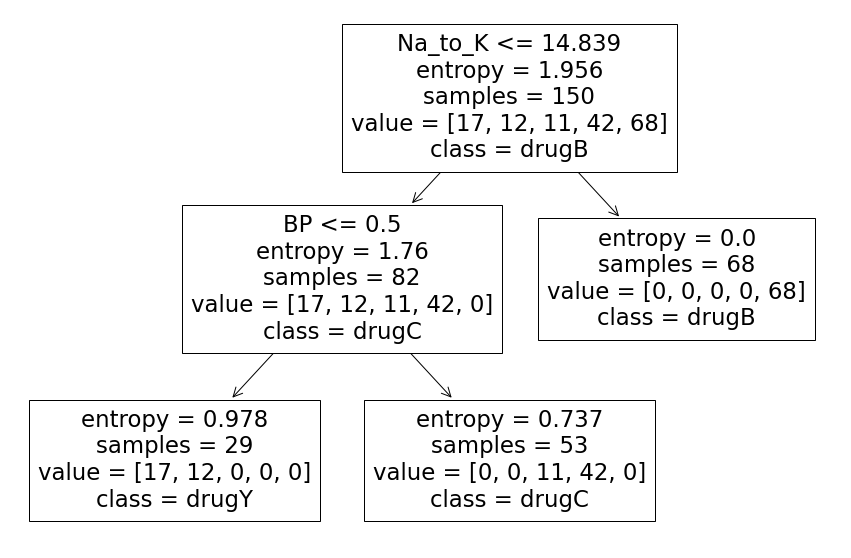

In [65]:
diag=plt.figure(figsize=(15,10))
tree.plot_tree(dt_obj,feature_names=dataset.columns,class_names=y_train.unique())